In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from copy import copy

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
region = 'GPGP'
mortality = 0.39              # [d-1]
runtime = 20                  # [days]
dt = 60                      # [seconds]
outputdt = 12                  # [hours]
mixing = 'no'
rho_p = 920
sizebinedges = [1e-3, 0.5e-3, 1e-4, 1e-5, 1e-6]

In [5]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_3D_grid2x2_allrho_allr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'/allrho/res_2x2/allr/tests/regional_'+region+'_bfadv_Jan_2004_3D_grid2x2_allrho_allr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'test3_regional_NPSG_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_3 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [6]:
labels = ['Paper 1', 'Paper 1 gemini', 'Paper 2 profiles', 'Paper 2 computation']

In [7]:
dslist = [ds_0, ds_1, ds_2, ds_3]

In [8]:
split_ds_0 = list(ds_0.groupby('r_pl'))
split_ds_1 = list(ds_1.groupby('r_pl'))
split_ds_2 = list(ds_2.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_3 = list(ds_3.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]

In [9]:
split_dslist = [split_ds_0, split_ds_1, split_ds_2, split_ds_3]

In [10]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue']
r_pl_clist = ['#7a0177', '#c51b8a', '#f768a1', '#fbb4b9','#feebe2']
r_pl_cmap = plt.get_cmap('RdPu_r')

In [11]:
number_of_trajectories_to_plot = 20
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 20 of 125 trajectories
plotting every 6 particles


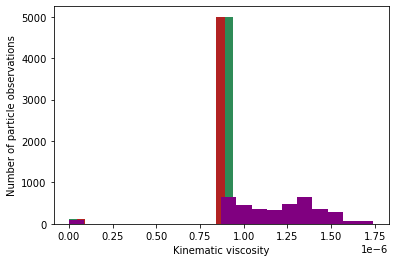

In [12]:
fig = plt.figure()
ax=plt.axes()
ax.hist(ds_0['kin_visc'].data.flatten(), 10, color=mixing_cmap[0])
ax.hist(ds_1['kin_visc'].data.flatten(), 20, color=mixing_cmap[1])
ax.hist(ds_2['kin_visc'].data.flatten(), 20, color=mixing_cmap[2])
ax.set_ylabel('Number of particle observations')
ax.set_xlabel('Kinematic viscosity')
plt.show()

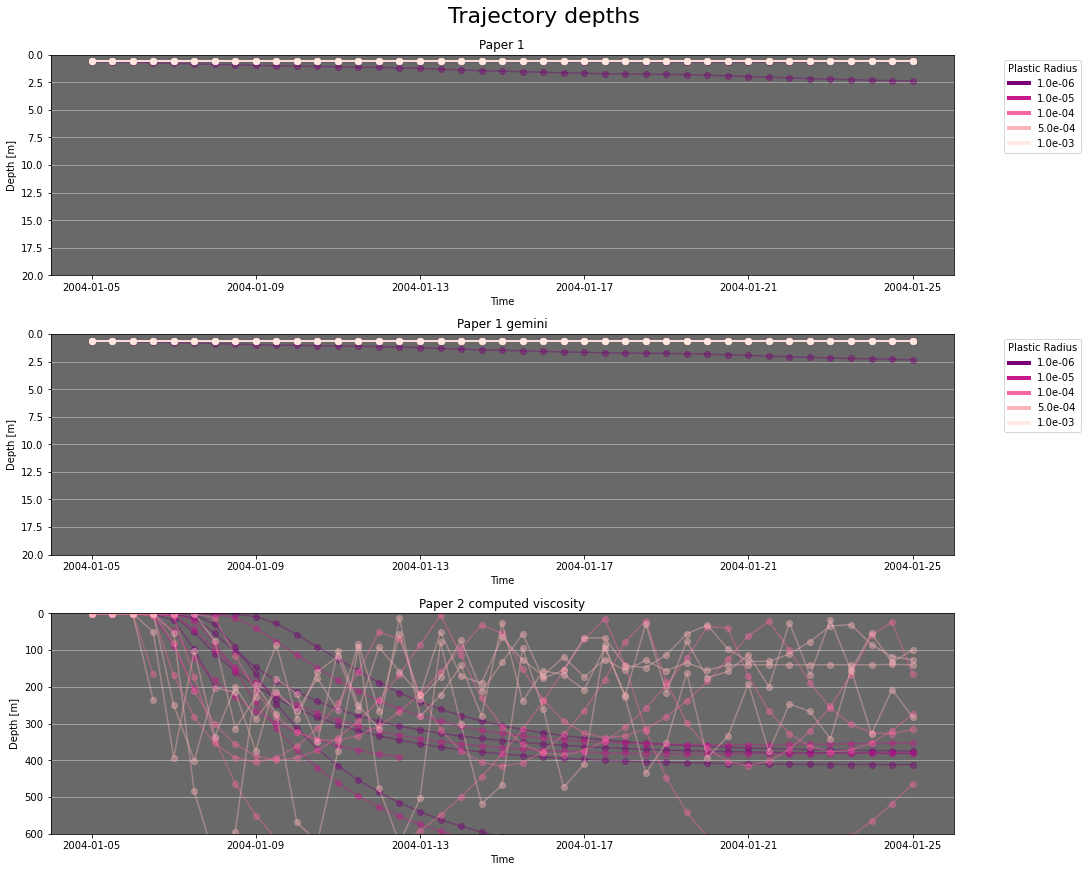

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,12), constrained_layout=True)
fig.suptitle('Trajectory depths', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)
    
ax1.set_title('Paper 1')
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Time')
ax1.set_facecolor('dimgray')
ax1.set_ylim(20,0)
ax1.grid(b=True, axis='y')

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax1.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)
    
ax2.set_title('Paper 1 gemini')
ax2.set_ylabel('Depth [m]')
ax2.set_xlabel('Time')
ax2.set_facecolor('dimgray')
ax2.set_ylim(20,0)
ax2.grid(b=True, axis='y')

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax2.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


# for i, r in enumerate(split_ds_1):
#     ax2.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)    

# ax2.set_title('Paper 2 viscosity profiles')
# ax2.set_ylabel('Depth [m]')
# ax2.set_xlabel('Time')
# ax2.set_facecolor('dimgray')
# ax2.set_ylim(600,0)
# ax2.grid(b=True, axis='y')

# custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
#                 Line2D([0], [0], color=r_pl_clist[1], lw=4),
#                 Line2D([0], [0], color=r_pl_clist[2], lw=4),
#                 Line2D([0], [0], color=r_pl_clist[3], lw=4)]

# ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)    

ax3.set_title('Paper 2 computed viscosity')
ax3.set_ylabel('Depth [m]')
ax3.set_xlabel('Time')
ax3.set_facecolor('dimgray')
ax3.set_ylim(600,0)
ax3.grid(b=True, axis='y')

# ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

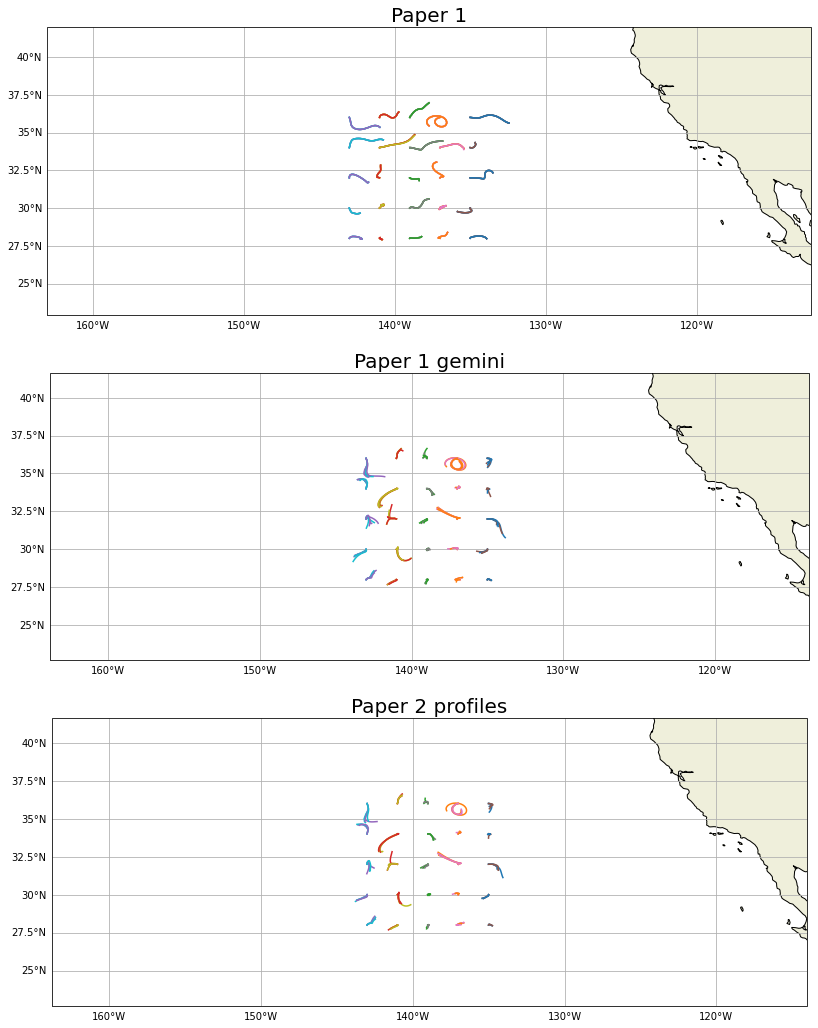

In [14]:
fig = plt.figure(figsize=(18,18))
gs = gridspec.GridSpec(ncols=1, nrows=3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[1, 0],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[2, 0],projection=ccrs.PlateCarree())
axes = [ax1, ax2, ax3]

for i, ax in enumerate(axes):
    ax.set_title(labels[i], fontsize=20)

    ax.plot(dslist[i]['lon'].T,dslist[i]['lat'].T)
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    ax.set_ylim(np.min(dslist[i]['lat'])-5,np.max(dslist[i]['lat'])+5)
    ax.set_xlim(np.min(dslist[i]['lon'])-20,np.max(dslist[i]['lon'])+20)
plt.show()

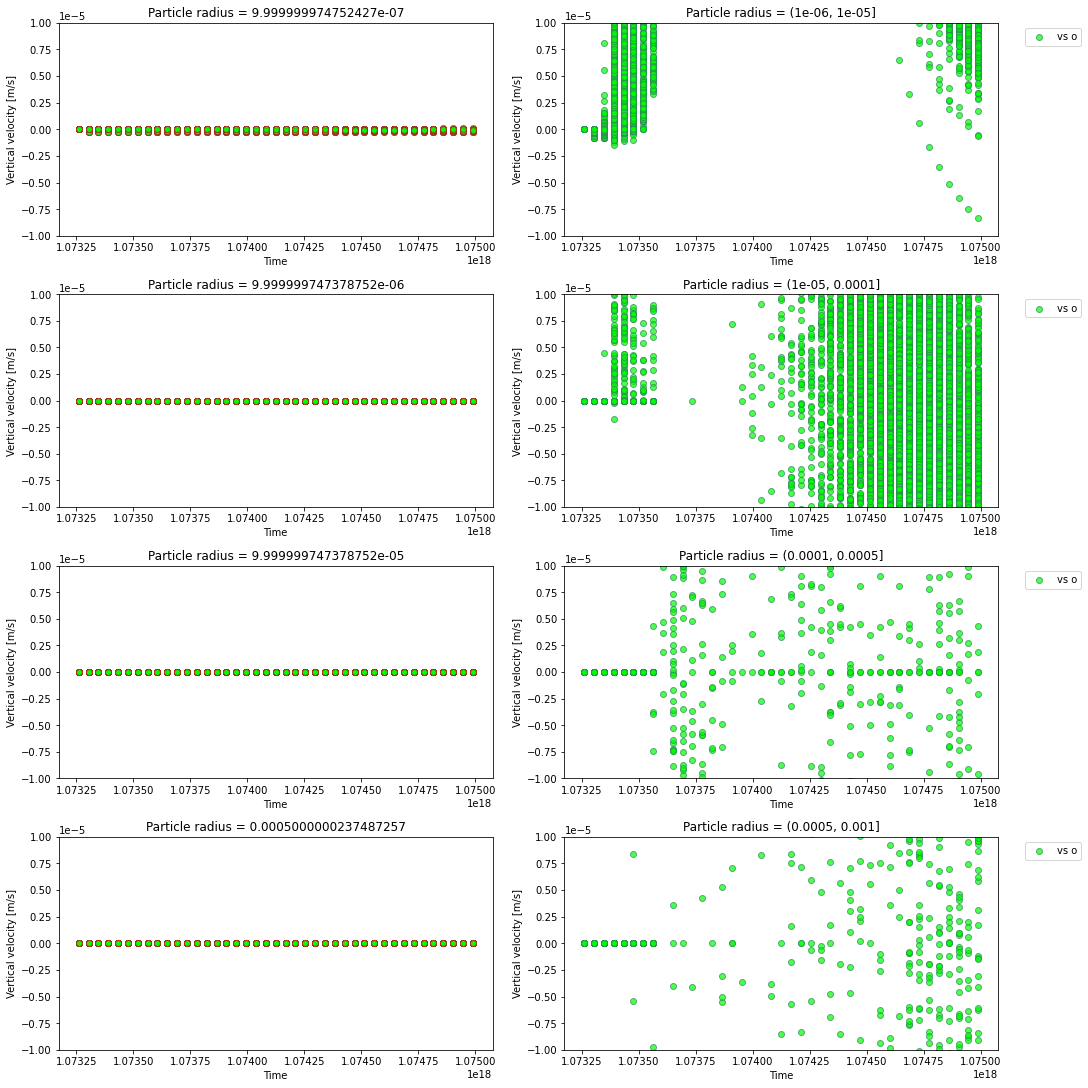

In [27]:
fig = plt.figure(figsize=(15,15), constrained_layout = True)
gs = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1])
axes = [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]]

for r, axr in enumerate(axes):
    for i, ax in enumerate(axr):
        split_ds = split_dslist[i]
#         ax.scatter(split_ds[r][1]['time'].astype('O'), split_ds[r][1]['w_m'], c=w_vel_cmap[0], edgecolor=mixing_cmap[i], alpha=0.7, label = 'w_m '+mixing[i])
        ax.scatter(split_ds[r][1]['time'].astype('O'), split_ds[r][1]['vs'], c=w_vel_cmap[1], edgecolor=mixing_cmap[i], alpha=0.7, label = 'vs '+mixing[i])
#         ax.scatter(split_ds[r][1]['time'].astype('O'), split_ds[r][1]['w'], c=w_vel_cmap[2], edgecolor=mixing_cmap[i], alpha=0.7, label = 'w '+mixing[i])

        ax.set_xlabel('Time')
        ax.set_ylim(-0.00001,0.00001)
        ax.set_ylabel('Vertical velocity [m/s]')
        ax.set_title('Particle radius = '+ str(split_ds[r][0]))
    axr[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

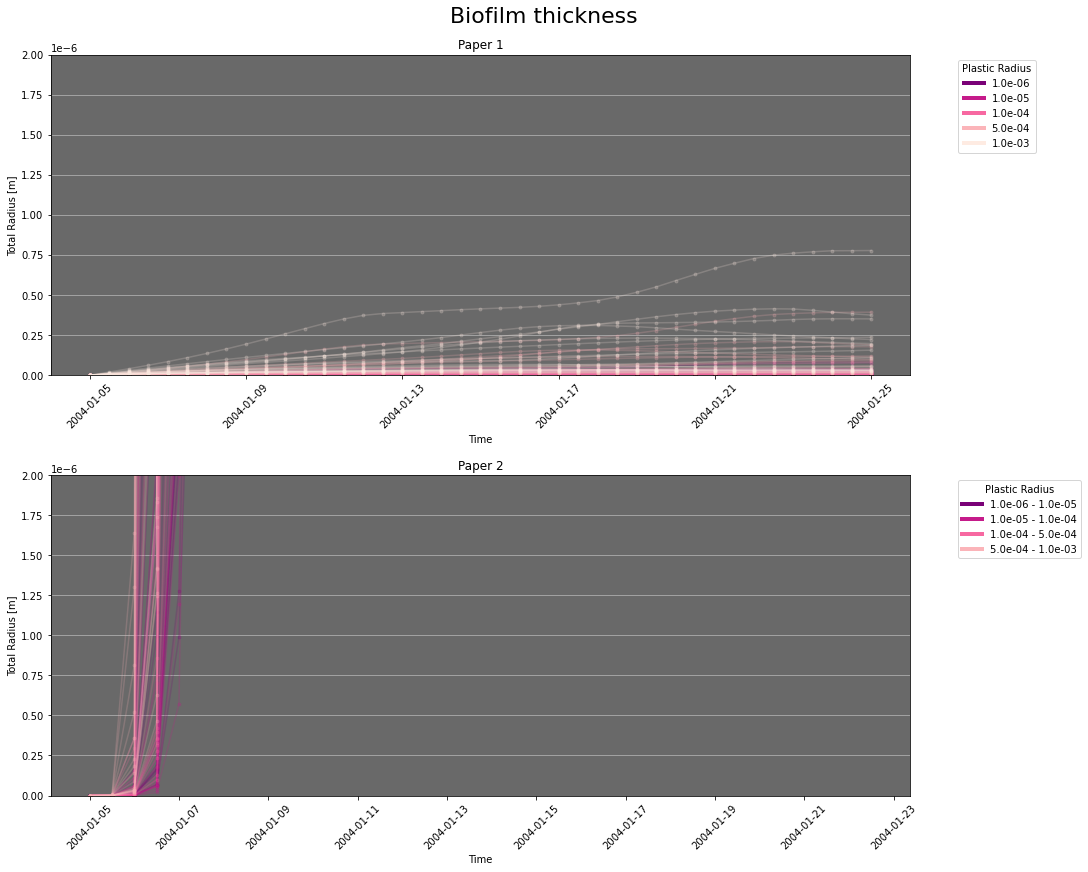

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,12), constrained_layout=True)
fig.suptitle('Biofilm thickness', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i], alpha=0.2)
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_ylim(0,2e-6)
ax1.set_title('Paper 1')
ax1.set_ylabel('Total Radius [m]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax1.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i], alpha=0.2)
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_ylim(0,2e-6)
ax2.set_title('Paper 2')
ax2.set_ylabel('Total Radius [m]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


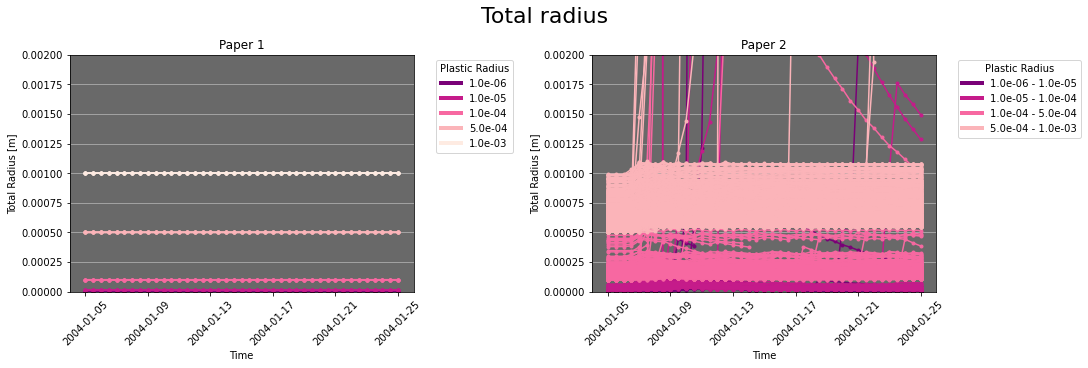

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Total radius', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,::f_plt], r[1]['r_tot'].T[:,::f_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_ylim(0,2e-3)
ax1.set_title('Paper 1')
ax1.set_ylabel('Total Radius [m]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax1.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,::f_plt], r[1]['r_tot'].T[:,::f_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_ylim(0,2e-3)
ax2.set_title('Paper 2')
ax2.set_ylabel('Total Radius [m]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

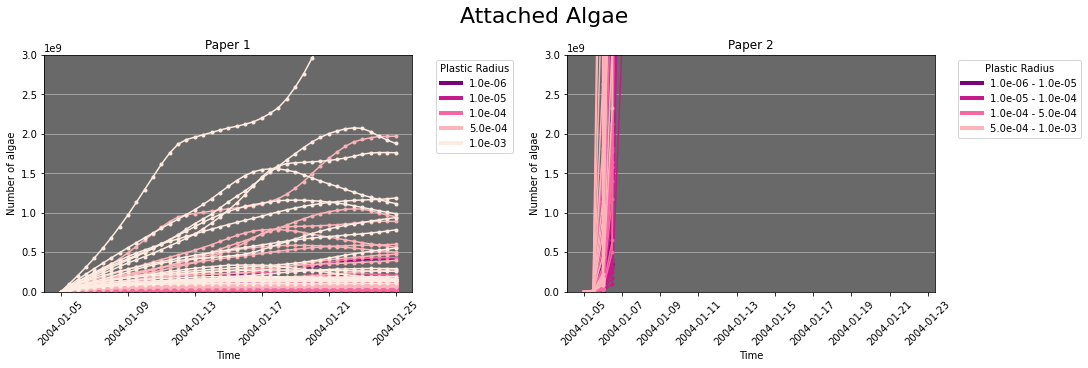

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Attached Algae', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['a'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_ylim(0,3e9)
ax1.set_title('Paper 1')
ax1.set_ylabel('Number of algae')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax1.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['a'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_ylim(0,3e9)
ax2.set_title('Paper 2')
ax2.set_ylabel('Number of algae')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

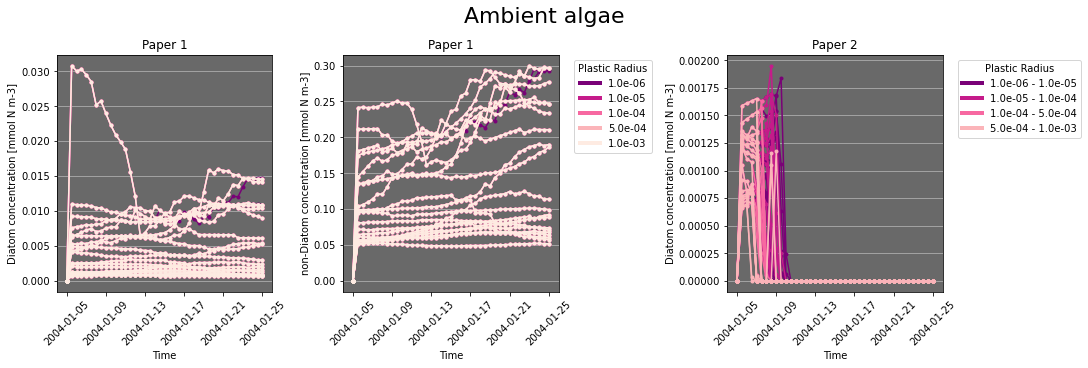

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('Ambient algae', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['d_phy'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
# ax1.set_ylim(-1,100)
ax1.set_title('Paper 1')
ax1.set_ylabel('Diatom concentration [mmol N m-3]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

for i, r in enumerate(split_ds_0):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['nd_phy'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
# ax2.set_ylim(-1,100)
ax2.set_title('Paper 1')
ax2.set_ylabel('non-Diatom concentration [mmol N m-3]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax2.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax3.plot(r[1]['time'].T[:,:n_plt], r[1]['d_phy'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax3.set_facecolor('dimgray')
ax3.grid(b=True, axis='y')
# ax2.set_ylim(-1,100)
ax3.set_title('Paper 2')
ax3.set_ylabel('Diatom concentration [mmol N m-3]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

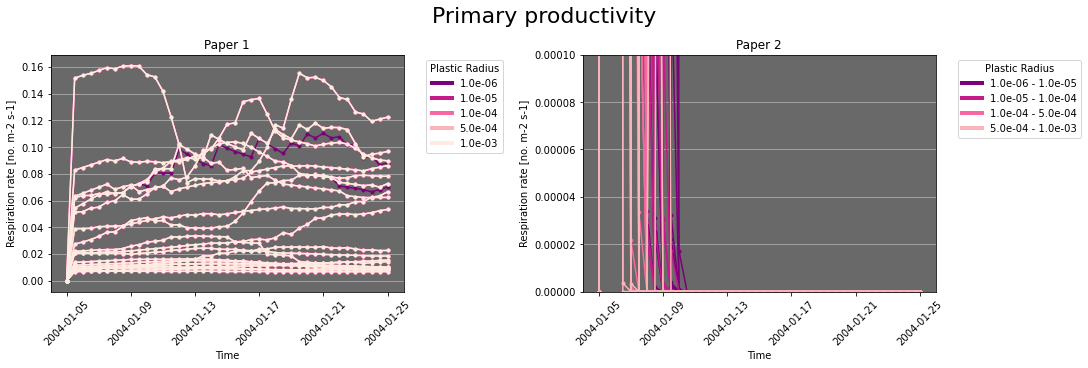

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Primary productivity', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['tpp3'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
# ax1.set_ylim(-1,100)
ax1.set_title('Paper 1')
ax1.set_ylabel('Respiration rate [no. m-2 s-1]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax1.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['tpp3'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_ylim(-0,1e-4)
ax2.set_title('Paper 2')
ax2.set_ylabel('Respiration rate [no. m-2 s-1]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

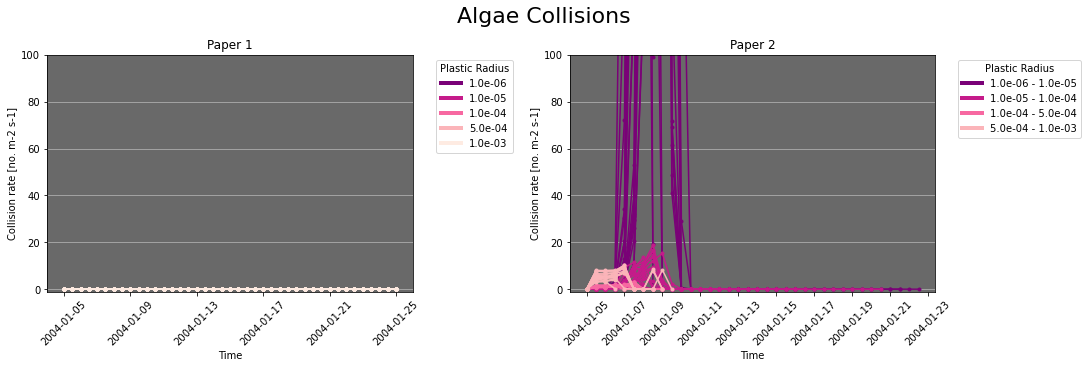

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Algae Collisions', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['a_coll'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_ylim(-1,100)
ax1.set_title('Paper 1')
ax1.set_ylabel('Collision rate [no. m-2 s-1]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax1.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['a_coll'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_ylim(-1,100)
ax2.set_title('Paper 2')
ax2.set_ylabel('Collision rate [no. m-2 s-1]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

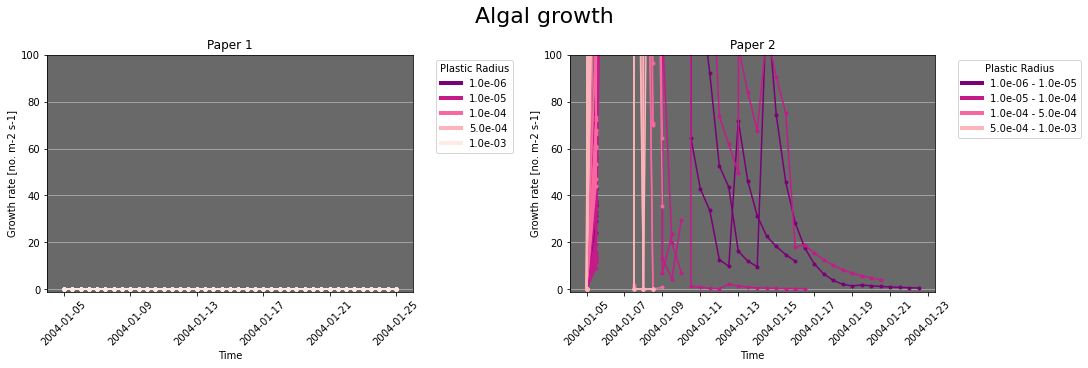

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Algal growth', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['a_growth'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_ylim(-1,100)
ax1.set_title('Paper 1')
ax1.set_ylabel('Growth rate [no. m-2 s-1]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax1.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['a_growth'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_ylim(-1,100)
ax2.set_title('Paper 2')
ax2.set_ylabel('Growth rate [no. m-2 s-1]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

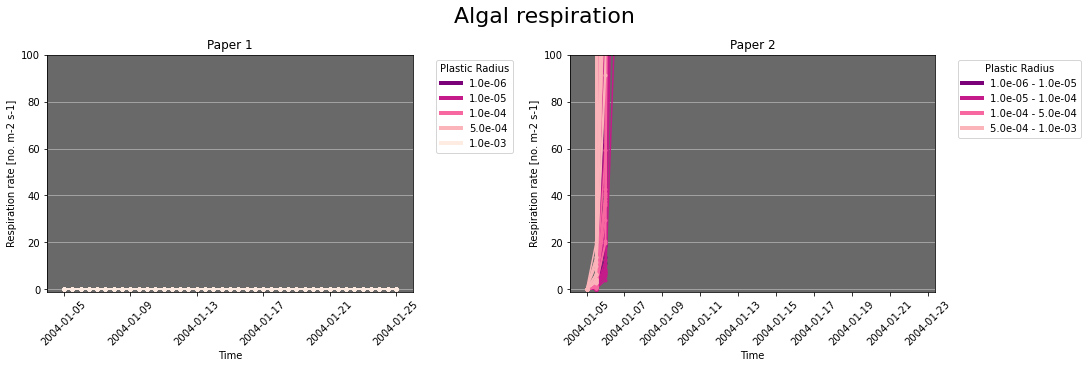

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), constrained_layout=True)
fig.suptitle('Algal respiration', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], r[1]['a_resp'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax1.set_facecolor('dimgray')
ax1.grid(b=True, axis='y')
ax1.set_ylim(-1,100)
ax1.set_title('Paper 1')
ax1.set_ylabel('Respiration rate [no. m-2 s-1]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4),
                Line2D([0], [0], color=r_pl_clist[4], lw=4)]

ax1.legend(custom_lines, ["{:.1e}".format(split_ds_0[0][0]), "{:.1e}".format(split_ds_0[1][0]), "{:.1e}".format(split_ds_0[2][0]), "{:.1e}".format(split_ds_0[3][0]), "{:.1e}".format(split_ds_0[4][0])], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], r[1]['a_resp'].T[:,:n_plt], marker='o', markersize=3 ,c=r_pl_clist[i])
ax2.set_facecolor('dimgray')
ax2.grid(b=True, axis='y')
ax2.set_ylim(-1,100)
ax2.set_title('Paper 2')
ax2.set_ylabel('Respiration rate [no. m-2 s-1]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds[0][0].left, right=split_ds[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[1][0].left, right=split_ds[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[2][0].left, right=split_ds[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds[3][0].left, right=split_ds[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')